#### POSTTEST 6
#### Nama : Mochammad Hollan Ardinata Saragih
#### NIM : 2109106103


Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from sklearn.preprocessing import OneHotEncoder

Membaca dataset

In [2]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Dataset dipangkas menjadi 5000 baris secara acak

In [3]:
n = 5000
if len(dataset) > n:
    random_indices = np.random.choice(len(dataset), n, replace=False)
    dataset = dataset.iloc[random_indices]

dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
32721,Male,80.0,0,0,never,27.32,7.0,140,1
77448,Male,80.0,0,0,No Info,25.18,4.5,159,0
31386,Male,40.0,0,0,never,27.43,4.5,80,0
23451,Male,47.0,0,0,No Info,31.25,6.6,155,0
81564,Female,48.0,0,0,ever,26.62,6.6,90,0
...,...,...,...,...,...,...,...,...,...
83901,Male,50.0,0,0,never,28.71,5.8,160,0
61821,Female,31.0,0,0,No Info,29.69,4.5,140,0
88954,Female,6.0,0,0,No Info,27.32,5.0,130,0
29768,Female,48.0,0,0,current,23.69,6.6,126,0


Memisahkan fitur dan target


In [4]:
X = dataset.drop('diabetes', axis=1) 
y = dataset['diabetes']

In [5]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Split dataset menjadi train dan test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Memisahkan kolom-kolom numerik dan kategorikal

In [7]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

Menggunakan OneHotEncoder dengan handle_unknown='ignore' pada kolom kategorikal

In [8]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

Mengkodekan kolom data kategorikal pada X_train dan X_test

In [9]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

Mengonversi seluruh dataset (fitur dan target) ke float32

In [10]:
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

Membuat Sequential model 

In [54]:
model = Sequential()
model.add(Dense(32, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [50]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                288       
                                                                 
 dense_22 (Dense)            (None, 8)                 264       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 561 (2.19 KB)
Trainable params: 561 (2.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Mengompilasi model

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.84 and logs.get('val_accuracy') > 0.84):
            self.model.stop_training = True

Melatih model

In [57]:
kolbek = MyCallback()
history = model.fit(
        X_train_encoded, 
        y_train, 
        epochs=10, 
        batch_size=64, 
        validation_data=(X_test_encoded, y_test),
        callbacks=[kolbek]
    )

Epoch 1/10
63/63 [==============================] - 1s 4ms/step - loss: 0.6004 - accuracy: 0.6948 - val_loss: 0.4159 - val_accuracy: 0.9280
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.9100 - val_loss: 0.2811 - val_accuracy: 0.9280


Evaluasi model

In [58]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.9280
Test loss: 0.28110140562057495
Test accuracy: 0.9279999732971191


Menampilkan grafik model loss dan model accuracy, baik pada training maupun validation

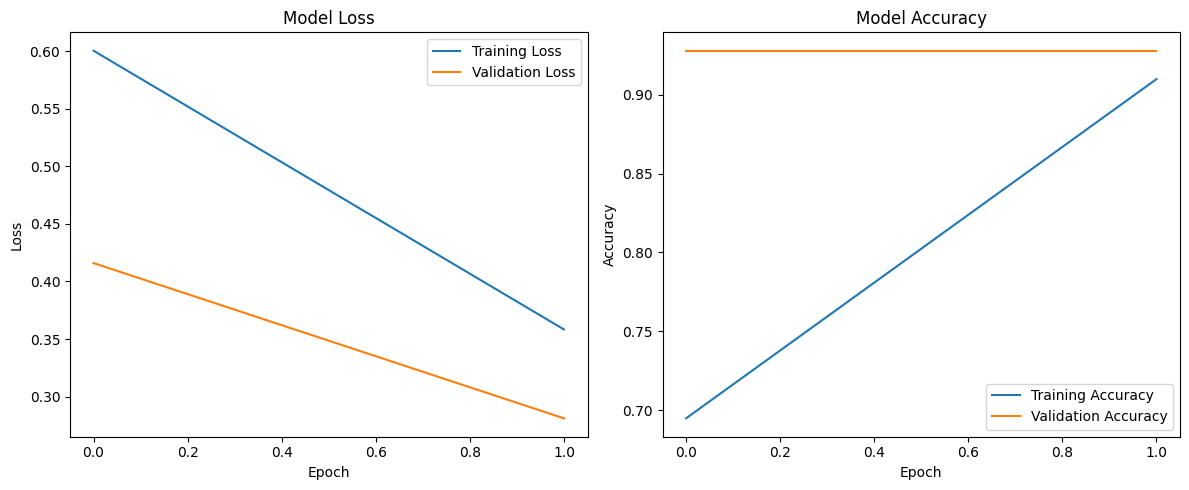

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()
